In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('TCC.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.TotalCharges.sort_values()


936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
3644    1004.35
5580     1004.5
5976    1004.75
1156     1005.7
6414     1006.9
5577     1007.8
3429     1007.9
742     1008.55
5423     1008.7
1507     1008.7
89      1009.25
4603      101.1
6482     101.45
6109     101.65
4575      101.9
2256       1010
3320    1011.05
4207     1011.5
6998     1011.8
1084     1012.4
692     1013.05
4100     1013.2
4217    1013.35
2242     1013.6
2872    1014.25
6049     1016.7
2866    1017.35
2246     102.45
5967      102.5
1486     102.75
2319     1020.2
7017    1020.75
1980    1021.55
535     1021.75
4795     1021.8
7003     1022.5
6951     1022.6
16      1022.95
6087    1023.75
186     1023.85
3121     1023.9
3106    1023.95
158     

In [31]:
df['TotalCharges'].count()-df[df.TotalCharges !=' ']['TotalCharges'].count()

11

In [32]:
median=df[df.TotalCharges!=' ']['TotalCharges'].astype('float32').median()
median

1397.47509765625

In [33]:
df['TotalCharges'][df.TotalCharges==' ']=median

<ipython-input-33-bc81d80e7f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df.TotalCharges==' ']=median


In [34]:
df.TotalCharges.value_counts()

20.2                11
1397.47509765625    11
19.75                9
19.9                 8
19.65                8
20.05                8
19.55                7
45.3                 7
20.15                6
20.25                6
19.45                6
20.3                 5
20.45                5
50.15                4
20.5                 4
44.4                 4
69.6                 4
19.95                4
19.4                 4
49.9                 4
19.85                4
69.95                4
20.4                 4
44                   4
69.9                 4
70.6                 4
19.3                 4
75.3                 4
19.5                 4
19.2                 4
74.7                 4
69.65                4
20.35                4
50.75                3
19.25                3
24.8                 3
74.9                 3
70.45                3
470.2                3
85.5                 3
220.45               3
1284.2               3
50.45                3
85         

In [35]:
df.info()
z=list(df.columns)
numerical=['tenure','MonthlyCharges','TotalCharges']
categorical=z
for item in numerical:
    categorical.remove(item)
for col in categorical:
    df[col]=pd.Categorical(df[col])
for col in numerical:
    df[col]=df[col].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df['TotalCharges']=df['TotalCharges'].astype('float32')

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [38]:
df.isnull().sum().sum()

0

No     5174
Yes    1869
Name: Churn, dtype: int64


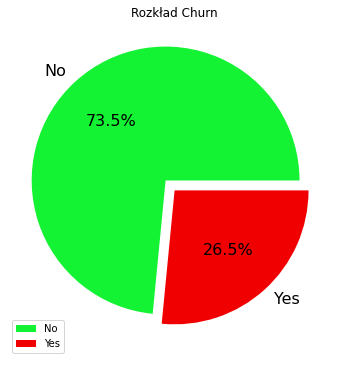

In [39]:
plt.figure(figsize=(6,8))
df.Churn.value_counts().plot(kind='pie', fontsize=16,colors=['#13f333','#f00000']
                             , explode=[0.1,0]
                            , shadow=False
                            ,autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład Churn')
print(df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


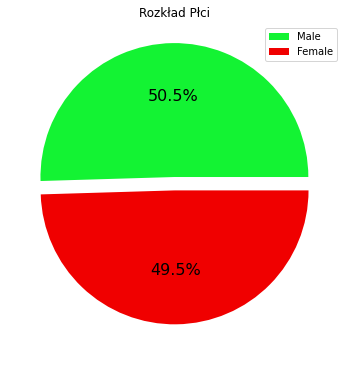

In [40]:
plt.figure(figsize=(6,8))
df.gender.value_counts().plot(kind='pie', fontsize=16,colors=['#13f333','#f00000']
                             , explode=[0.1,0]
                            , shadow=False
                            ,autopct='%1.1f%%'
                             ,labels=['',''])
plt.legend(['Male','Female'])
plt.ylabel('')
plt.title('Rozkład Płci')
print(df.gender.value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


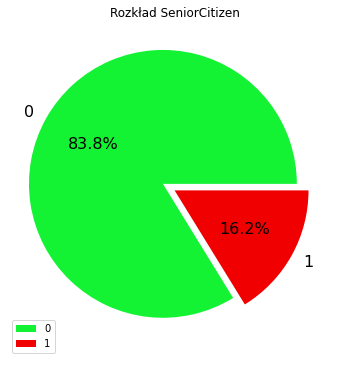

In [41]:
plt.figure(figsize=(6,8))
df.SeniorCitizen.value_counts().plot(kind='pie', fontsize=16,colors=['#13f333','#f00000']
                             , explode=[0.1,0]
                            , shadow=False
                            ,autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład SeniorCitizen')
print(df.SeniorCitizen.value_counts())

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

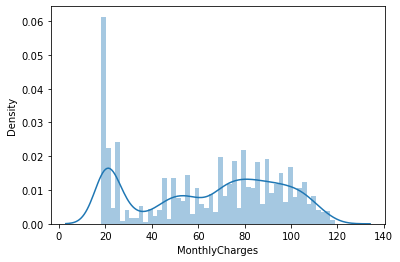

In [44]:
sns.distplot(df.MonthlyCharges, bins=50)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

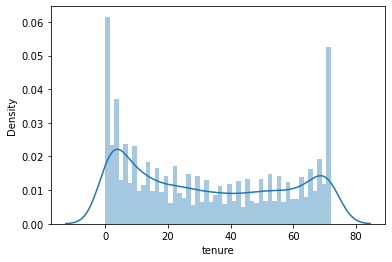

In [45]:
sns.distplot(df.tenure, bins=50)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


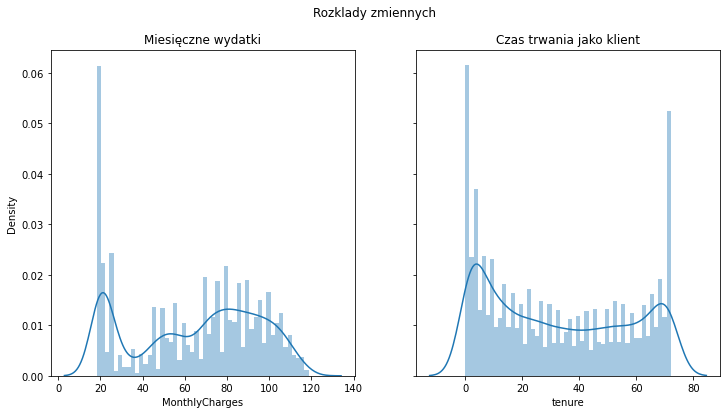

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
sns.distplot(df.MonthlyCharges, bins=50, ax=ax[0])
sns.distplot(df.tenure, bins=50, ax=ax[1])
fig.suptitle('Rozklady zmiennych')
ax[0].title.set_text('Miesięczne wydatki')
ax[1].title.set_text('Czas trwania jako klient')

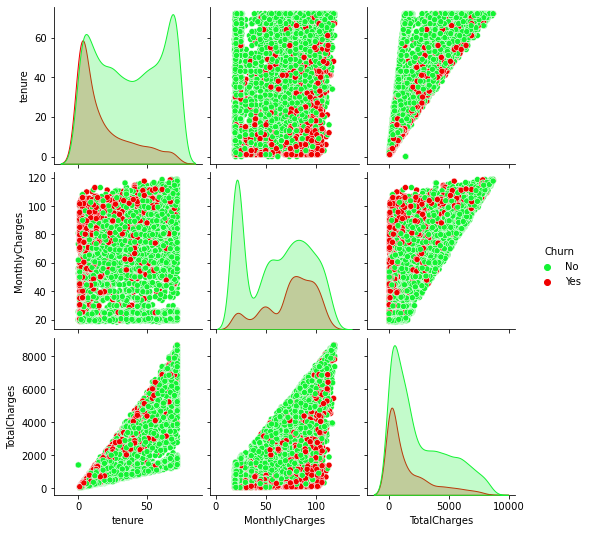

In [56]:
sns.pairplot(data=df,palette=['#13f333','#f00000'], vars=['tenure','MonthlyCharges','TotalCharges'], hue='Churn')

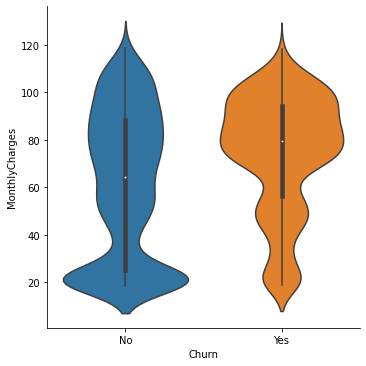

In [58]:
sns.catplot(data=df, kind='violin', x='Churn', y='MonthlyCharges')

<AxesSubplot:>

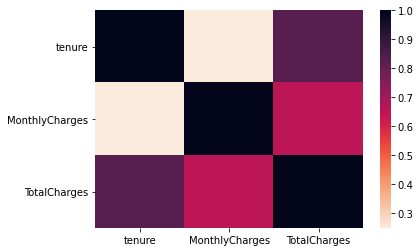

In [61]:
sns.heatmap(df.corr(), cmap = sns.cm.rocket_r)

In [60]:
help(sns.heatmap
    )

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 